# Implementing DNN Classifier with TensorFlow and Keras 

**TensorFlow** as being described in its official website is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.
So, What is Keras?

**Keras** is a high-level API for Deep Learning that can implement (build, train and evaluate) any sort of Deep Neural Networks (DNN). It was developed as a research project by Francois Chollet. It becomes popular because of its flexibility, its ease of use and its ability to do NN heavy computations.

As it's high-level API, it relies on a computation backend libraries such as Theano, Microsoft Cognitive Toolkit (CNTK) and of course TensorFlow and because of that it's called multi-backend Keras.

TensorFlow adopted Keras as its official high-level API abd it now comes bundled with its own Keras implementation, tensorflow.keras. It only supports TensorFlow as the backend, but it has the advantage of offering some very useful extra features.
Installation

It's preferred to build your TensorFlow backend library on a virtual environment. You can build it directly on your conda-base environment or create a new environment with the folowing command:

$ conda create -n tf

The activate it:

$ conda activate tf

Then to install TensorFlow (latest version) just run the following command:

$ pip install tensorflow

If you want to install a separate copy of Keras:

$ pip install keras


In [ ]:
# Testing your installation
import tensorflow as tf
from tensorflow import keras
import numpy as np

print('TensorFlow: ', tf.__version__)
print('Keras', keras.__version__)

TensorFlow:  2.7.0
Keras 2.7.0


In [ ]:
f_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = f_mnist.load_data()
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('X data type: ', X_train.dtype)
print('y_train shape: ', y_train.shape)

X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)
X data type:  uint8
y_train shape:  (60000,)


In [ ]:
X_train[1][0]

array([  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
        54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

## Preparing the image data

Before training, we’ll preprocess the data by:

1. Scaling it (as we will use the Gradient Descent to train our network) so that all values are in the [0, 1] interval.
2. Training images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval per pixel. We will transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

dataset [link](https://github.com/zalandoresearch/fashion-mnist)

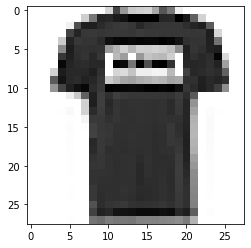

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70   

In [ ]:
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.show()
print(X_train[1])

In [ ]:
X_train = X_train/255

In [ ]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.00392157, 0.        , 0.        , 0.        , 0.        , 0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        , 0.        , 0.        , 0.19215686, 0.53333333, 0.85882353, 0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843, 0.90588235, 0.62745098, 0.17647059, 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255, 0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.79215686, 0.78823529, 0.78823529, 0.78823529, 0.81960784, 0.85490196, 0.87843137, 0.

In [ ]:
class_name = np.array(["T-shirt/top", "Trouser", "Pullover",
                       "Dress", "Coat", "Sandal", "Shirt",
                       "Sneaker", "Bag", "Ankle boot"])

In [ ]:
y_train[1], class_name[y_train[1]]

(0, 'T-shirt/top')

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
# Create Sequential Model
model = keras.models.Sequential()

# Adding our layers
from tensorflow.keras import layers

model.add(layers.Flatten(input_shape=X_train[0].shape, name='input'))
model.add(layers.Dense(500, activation='relu', name='hidden_1'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(300, activation='relu', name='hidden_2'))
model.add(layers.Dense(10, activation='softmax', name='output'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 500)               392500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 hidden_2 (Dense)            (None, 300)               150300    
                                                                 
 output (Dense)              (None, 10)                3010      
                                                                 
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden_1 = model.layers[1]
h1_weights, h1_bias = hidden_1.get_weights()
print(h1_weights.shape)
print(h1_bias.shape)

(784, 500)
(500,)


In [ ]:
h1_weights[0][5]

0.011122055

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adamax',
             metrics=['accuracy'])

In [ ]:
# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)


history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_split=5/60,
                    callbacks=[checkpoint_cb, early_stopping_cb])#,batch_size =60000  

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1894 - accuracy: 0.9272 - val_loss: 0.3156 - val_accuracy: 0.8990
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1795 - accuracy: 0.9308 - val_loss: 0.3113 - val_accuracy: 0.8998
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1755 - accuracy: 0.9326 - val_loss: 0.3161 - val_accuracy: 0.8988
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1728 - accuracy: 0.9338 - val_loss: 0.3190 - val_accuracy: 0.8980
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1690 - accuracy: 0.9344 - val_loss: 0.3192 - val_accuracy: 0.8992
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1653 - accuracy: 0.9362 - val_loss: 0.3250 - val_accuracy: 0.8996
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1635 - accuracy: 0.9364 - val_loss: 0.3224 - val_accuracy:

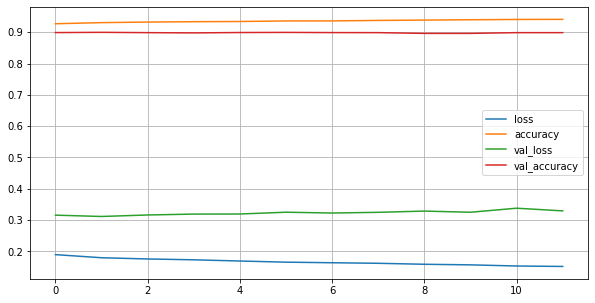

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

learning_data = pd.DataFrame(history.history)
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(X_test/255, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3179 - accuracy: 0.8988


[0.31792041659355164, 0.8988000154495239]

In [ ]:
X_new = X_test[5].reshape(1,-1)
y_pred = model.predict(X_new)
y_pred

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
print(X_test[5])


[[  0   0   0   0   0   0   0   0   0   0 192 188 181 189 157 165 188 176 179 181   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14 235 213 213 223 225 217 214 204 211 189   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  22 234 217 211 217 200 203 217 203 179 170   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 105 252 205 209 219 193 195 212 207 194 204  51   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 204 228 184 206 215 221 212 209 199 190 227 105   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 244 192 193 212 217 210 216 216 194 175 225 131   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  25 247 170 192 210 211 239 231 219 199 179 217 124   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  49 236 170 193 201 220 187 231 230 206 181 213 116   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  87 232 159 193 200 245   0 207 245 200 176 21

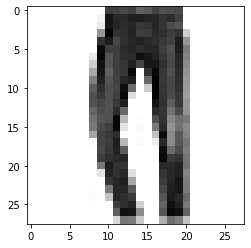

In [ ]:
plt.imshow(X_test[5], cmap=plt.cm.binary)
plt.show()

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
print('actual values', y_test[5])
print('predicted values', y_pred)
class_name[y_pred[:]]


actual values 1
predicted values [1]


array(['Trouser'], dtype='<U11')